In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [50]:
test=pd.read_csv('Data_mar.csv')

In [51]:
df_col=['is_m2m',
 'spl_hdl_lst_ind',
 'w_grp_ind',
 '是否第一张合约届满',
 'cmhk_opt_out',
 'wth_mlti_sim',
 '是否自动续约',
 '是否携号入网',
 'wth_auto_ext_ofr',
 'non_cmhk_opt_out',
 'auto_ext_ind',
 'non_cmhk_opt_out_sts',
 'cmhk_opt_out_sts',
 'voc_opt_out_sts',
 'dnc_vod_opt_out_sts',
 'surv_opt_out_sts',
 'dnc_sms_opt_out_sts',
 'sms_opt_out_sts',
 'eml_opt_out_sts',
 'tes_opt_out_sts',
 'bil_opt_out_sts']
 
dec_mtx=np.array([-0.10653932, -0.10650606, -0.10562832, -0.06941428, -0.06460407,
       -0.06101335, -0.0366774 , -0.0351418 , -0.03406811, -0.00530109,
        0.00045976,  0.02522192,  0.05923626,  0.06405652,  0.06405652,
        0.0648496 ,  0.06823851,  0.06823851,  0.06850305,  0.07061688,
        0.07141627])

In [52]:
_0_count_test=[]
tt=test.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in df_col:
        if row[x]=='N':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

test_array=np.array(_0_count_test)
    

a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')

In [89]:
y_pred=[]
tor=[]
for x in test_array:
    churn=dec_mtx.dot(x)
    tor.append(churn)
    if churn >=-0.31118400913770394:
        y_pred.append(1)
    else:
        y_pred.append(-1)
y_pred=np.array(y_pred)

<ipython-input-90-d1fbec7d842d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(outcome['outcome'], hist=True, kde=False,


Text(0, 0.5, 'cumulative')

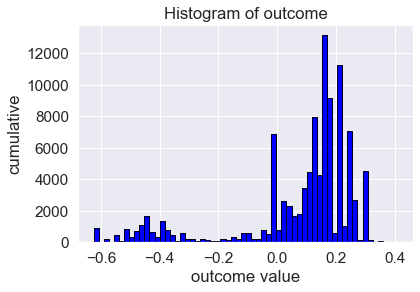

In [90]:
outcome=pd.DataFrame(tor,columns=['outcome'])
plt.hist(outcome['outcome'], color = 'blue', edgecolor = 'black',
         bins = int(180/3))

# seaborn histogram
sn.distplot(outcome['outcome'], hist=True, kde=False, 
             bins=int(180/3), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of outcome')
plt.xlabel('outcome value')
plt.ylabel('cumulative')

In [91]:
val=y_pred-y_test['是否离网'].to_numpy()
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100

98.96544263713785

In [92]:
conf_list=[0,0,0,0]
for i in range(len(y_pred)):
    if y_test['是否离网'].to_numpy()[i]==-1:
        if val[i]==0:
            conf_list[0]+=1
        else:
            conf_list[1]+=1
    else:
        if val[i]==0:
            conf_list[3]+=1
        else:
            conf_list[2]+=1
np.set_printoptions(suppress=True)
conf_mrtx=np.array(conf_list)

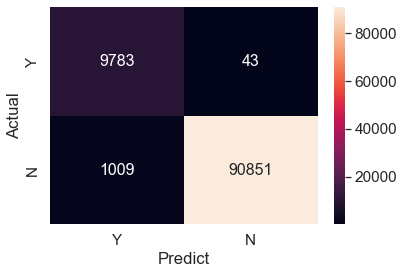

In [93]:
df_cm = pd.DataFrame(conf_mrtx.reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
plt.xlabel('Predict')
plt.ylabel('Actual')
sn.set(font_scale=1.4) # for label size


plt.show()

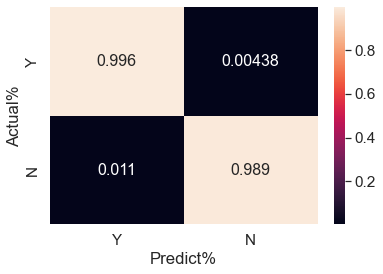

In [94]:
conf_prec=[conf_list[0]/sum(conf_list[0:2]),conf_list[1]/sum(conf_list[0:2]),conf_list[2]/sum(conf_list[2:]),conf_list[3]/sum(conf_list[2:])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size

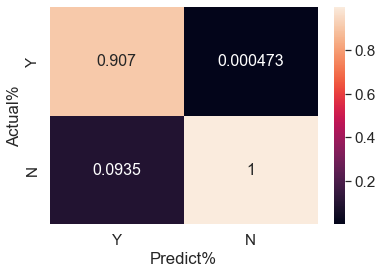

In [95]:
conf_prec=[conf_list[0]/(conf_list[0]+conf_list[2]),conf_list[1]/(conf_list[1]+conf_list[3]),conf_list[2]/(conf_list[0]+conf_list[2]),conf_list[3]/(conf_list[1]+conf_list[3])]
df_cm = pd.DataFrame(np.array(conf_prec).astype('float').reshape(2,2),index = ['Y','N'], columns =  ['Y','N'])
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.3g') # font size
plt.xlabel('Predict%')
plt.ylabel('Actual%')
sn.set(font_scale=1.4) # for label size